<a href="https://colab.research.google.com/github/Ronitbera/e-commerce/blob/main/E_commerce_Furniture_Dataset_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Identify  items and overall sales performance over time.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data Cleaning

In [ ]:
df=pd.read_csv("/content/ecommerce_furniture_dataset_2024 (1).csv")

In [ ]:
df['price'] = pd.to_numeric(df['price'].str.replace('$', '', regex=False), errors='coerce')
df['originalPrice'] = pd.to_numeric(df['originalPrice'].str.replace('$', '', regex=False), errors='coerce')

In [ ]:
df['originalPrice'].fillna(df['price'], inplace=True)

<ipython-input-11-2bd32c1d4d30>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['originalPrice'].fillna(df['price'], inplace=True)


In [ ]:
df['discount_pct'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100
df['discount_pct'] = df['discount_pct'].round(2)

In [ ]:
df['tagText'] = df['tagText'].fillna('no tag').str.lower().str.strip()

In [ ]:
df['productTitle'] = df['productTitle'].str.strip()

In [ ]:
def extract_category(title):
    title = title.lower()
    if "dresser" in title:
        return "Dresser"
    elif "chair" in title:
        return "Chair"
    elif "desk" in title:
        return "Desk"
    elif "sofa" in title:
        return "Sofa"
    elif "bed" in title:
        return "Bed"
    elif "table" in title:
        return "Table"
    elif "cabinet" in title:
        return "Cabinet"
    elif "shelf" in title or "shelving" in title:
        return "Shelf"
    elif "nightstand" in title:
        return "Nightstand"
    elif "couch" in title:
        return "Couch"
    elif "set" in title:
        return "Set"
    else:
        return "Other"

df['category'] = df['productTitle'].apply(extract_category)

In [ ]:
print(df[['productTitle', 'category', 'originalPrice', 'price', 'discount_pct', 'sold', 'tagText']].head(10))

                                        productTitle category  originalPrice  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...  Dresser          46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...    Chair         169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...      Bed          78.40   
3  Modern Accent Boucle Chair,Upholstered Tufted ...    Chair         111.99   
4  Small Unit Simple Computer Desk Household Wood...     Desk          48.82   
5  3 Pieces Patio Furniture Set, Outdoor Swivel G...    Chair         123.40   
6  5-Piece Patio Furniture Set Outdoor Couch with...    Table         198.31   
7  Living Room Furniture, Modern 3-Piece Includin...    Chair         734.58   
8  TV Stand Dresser For Bedroom With 5 Fabric Dra...  Dresser          43.96   
9  Outdoor Furniture Set 3 Pieces Wicker Patio Fu...    Table         233.30   

    price  discount_pct  sold        tagText  
0   46.79          0.00   600  free shipping  
1  169.72          0.00  

Exploratory Data Analysis

In [ ]:
sns.set(style="whitegrid")

In [ ]:
df

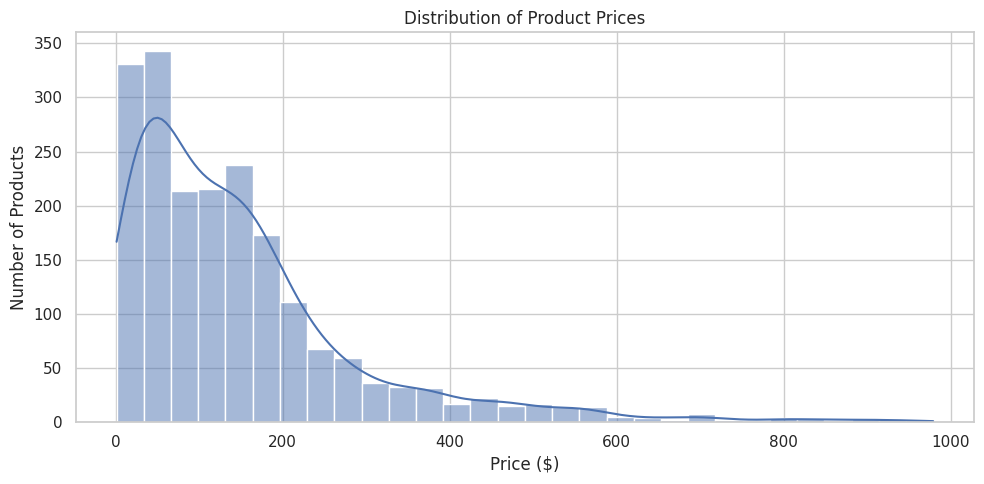

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

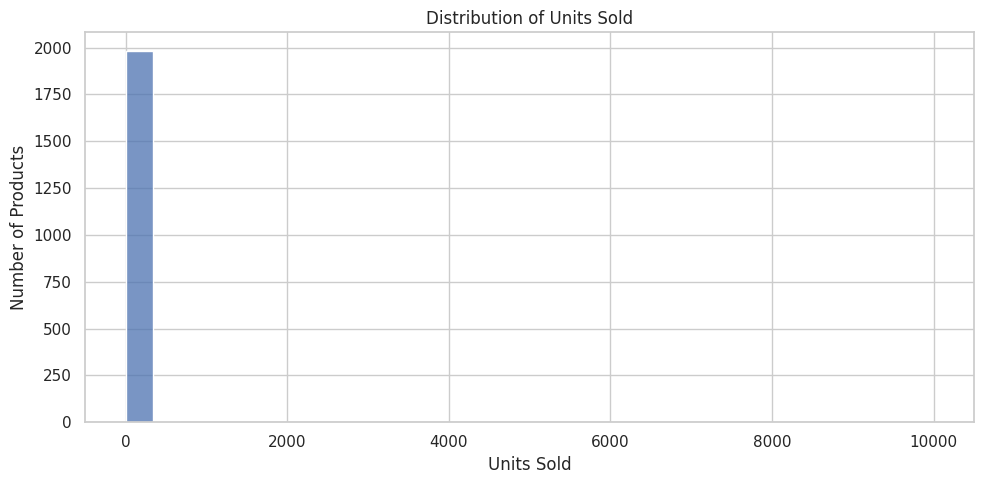

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['sold'], bins=30)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

<ipython-input-26-c55bc9378779>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_sold.index, y=category_avg_sold.values, palette='viridis')


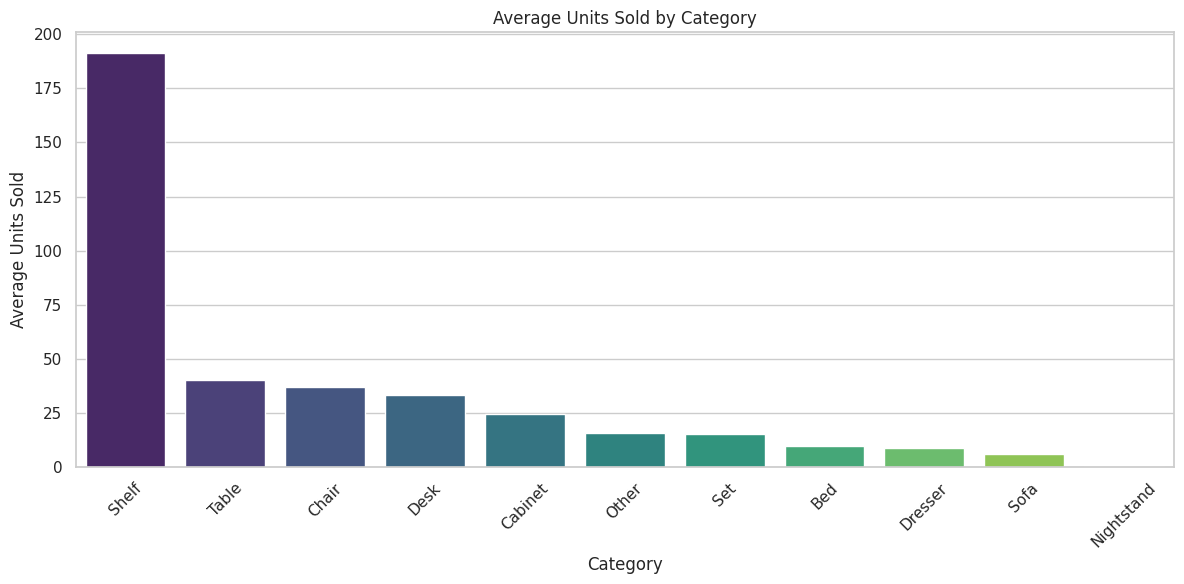

In [ ]:
plt.figure(figsize=(12, 6))
category_avg_sold = df.groupby('category')['sold'].mean().sort_values(ascending=False)
sns.barplot(x=category_avg_sold.index, y=category_avg_sold.values, palette='viridis')
plt.title('Average Units Sold by Category')
plt.ylabel('Average Units Sold')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

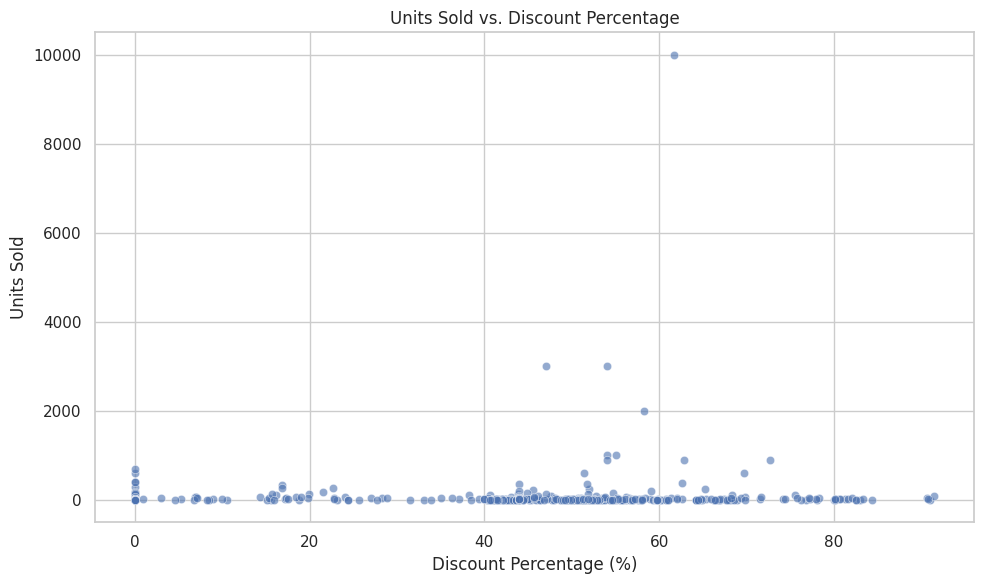

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discount_pct', y='sold', alpha=0.6)
plt.title('Units Sold vs. Discount Percentage')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

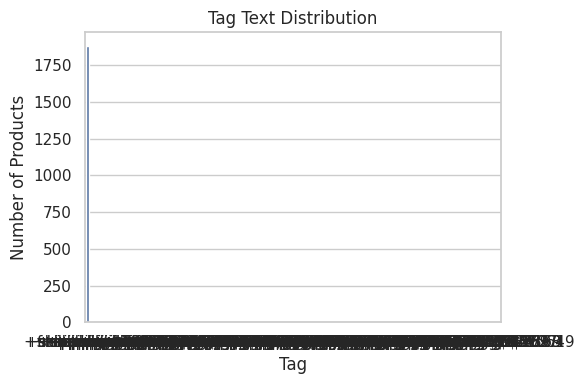

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='tagText', order=df['tagText'].value_counts().index)
plt.title('Tag Text Distribution')
plt.xlabel('Tag')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

Feature Engineering Code

In [ ]:
df['discount_pct'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100
df['discount_pct'] = df['discount_pct'].fillna(0).round(2)

In [ ]:
df['price_bin'] = pd.cut(df['price'],
                         bins=[0, 50, 100, 200, 500, 1000, np.inf],
                         labels=['<50', '50-100', '100-200', '200-500', '500-1000', '1000+'])

In [ ]:
df['title_word_count'] = df['productTitle'].str.split().apply(len)

In [ ]:
df['has_free_shipping'] = df['tagText'].apply(lambda x: 1 if 'free shipping' in x.lower() else 0)

In [ ]:
df['is_discounted'] = (df['discount_pct'] > 0).astype(int)

In [ ]:
df['category_encoded'] = df['category'].astype('category').cat.codes

In [ ]:
df['price_per_word'] = df['price'] / df['title_word_count']
df['price_per_word'] = df['price_per_word'].replace([np.inf, -np.inf], 0).fillna(0).round(2)

In [ ]:
print(df[['productTitle', 'price', 'originalPrice', 'discount_pct', 'price_bin',
          'title_word_count', 'has_free_shipping', 'is_discounted',
          'category', 'category_encoded', 'price_per_word']].head(10))

                                        productTitle   price  originalPrice  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...   46.79          46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...  169.72         169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...   39.46          78.40   
3  Modern Accent Boucle Chair,Upholstered Tufted ...  111.99         111.99   
4  Small Unit Simple Computer Desk Household Wood...   21.37          48.82   
5  3 Pieces Patio Furniture Set, Outdoor Swivel G...  123.40         123.40   
6  5-Piece Patio Furniture Set Outdoor Couch with...  198.31         198.31   
7  Living Room Furniture, Modern 3-Piece Includin...  734.58         734.58   
8  TV Stand Dresser For Bedroom With 5 Fabric Dra...   43.96          43.96   
9  Outdoor Furniture Set 3 Pieces Wicker Patio Fu...  233.30         233.30   

   discount_pct price_bin  title_word_count  has_free_shipping  is_discounted  \
0          0.00       <50                19      

Model Selection & Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
features = [
    'price', 'discount_pct', 'title_word_count', 'has_free_shipping',
    'is_discounted', 'category_encoded', 'price_per_word']
X = df[features]
y = df['sold']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:

y_pred = model.predict(X_test)

In [ ]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f" Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

🔍 Model Evaluation Metrics:
Mean Squared Error (MSE): 86628.80
Mean Absolute Error (MAE): 45.99
R² Score: -14.80


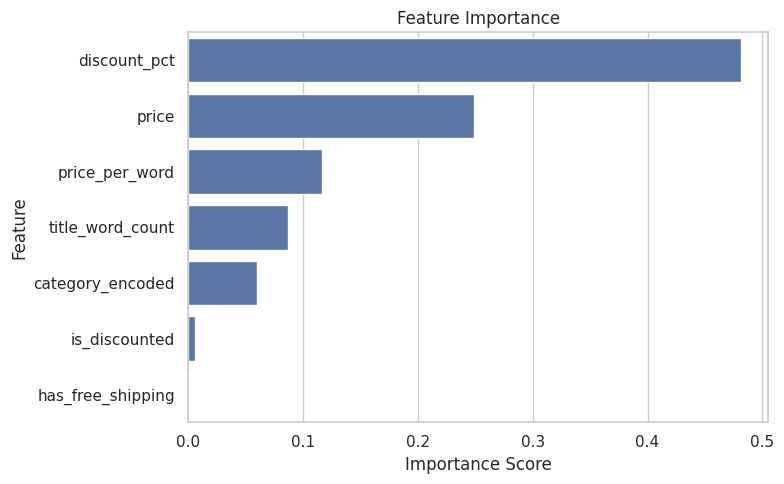

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Evaluations

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔍 Evaluation Results:")
print(f"• Mean Absolute Error (MAE): {mae:.2f}")
print(f"• Mean Squared Error (MSE): {mse:.2f}")
print(f"• Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"• R² Score: {r2:.2f}")


🔍 Evaluation Results:
• Mean Absolute Error (MAE): 45.99
• Mean Squared Error (MSE): 86628.80
• Root Mean Squared Error (RMSE): 294.33
• R² Score: -14.80


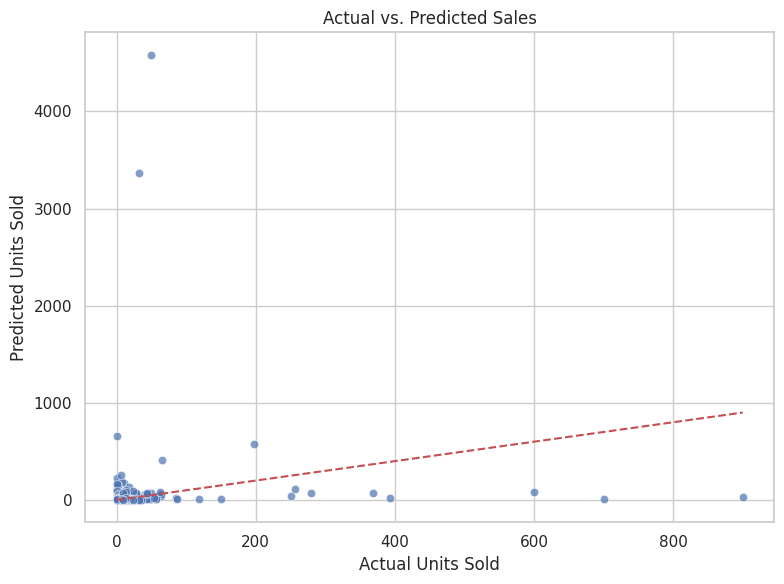

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs. Predicted Sales")
plt.tight_layout()
plt.show()


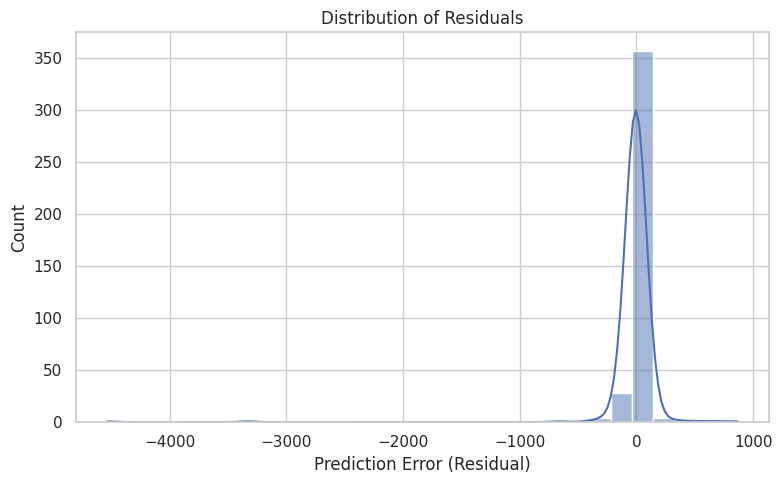

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error (Residual)")
plt.tight_layout()
plt.show()


In [ ]:
df

,productTitle,originalPrice,price,sold,tagText,discount_pct,category,price_bin,title_word_count,has_free_shipping,is_discounted,category_encoded,price_per_word
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,46.79,600,free shipping,0.00,Dresser,<50,19,1,0,4,2.46
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,169.72,0,free shipping,0.00,Chair,100-200,18,1,0,2,9.43
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,free shipping,49.67,Bed,<50,19,1,1,0,2.08
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,111.99,0,free shipping,0.00,Chair,100-200,17,1,0,2,6.59
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,free shipping,56.23,Desk,<50,17,1,1,3,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,72.49,72.49,8,free shipping,0.00,Bed,50-100,18,1,0,0,4.03
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",276.65,276.65,2,free shipping,0.00,Dresser,200-500,17,1,0,4,16.27
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",196.44,196.44,10,free shipping,0.00,Sofa,100-200,20,1,0,9,9.82
1998,Furniture Acrylic Coffee Table Transparent Liv...,228.18,228.18,0,free shipping,0.00,Sofa,200-500,18,1,0,9,12.68


In [ ]:
df.to_csv('cleaned_ecommerce_data.csv', index=False)